In [1]:
pip install pandas numpy seaborn matplotlib librosa ipython

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('../wav'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [8]:
PATH = '../wav/'

# Emotion codes and their meanings (comes from German)
emotion_codes = {
    'W': 'anger',
    'L': 'boredom',
    'E': 'disgust',
    'A': 'anxiety',
    'F': 'happiness',
    'T': 'sadness',
    'N': 'neutral'
}

# Variables to hold data
file_emotion = []
file_path = []
speakers = []

# List of audio files in the EMODB directory (replace 'directory_list' with actual list of files)
directory_list = os.listdir(PATH)

for file in directory_list:
    file_path.append(PATH + file)
    speakers.append(int(file[:2]))  # Speaker ID is the first two characters
    emotion_code = file[5]  # Emotion code is the sixth character
    file_emotion.append(emotion_codes.get(emotion_code, 'Unknown'))  # Map emotion code to emotion

# Create DataFrame
emodb_df = pd.DataFrame(list(zip(speakers, file_emotion, file_path)),
                        columns=['SpeakerID', 'Emotion', 'Path'])

emodb_df

,SpeakerID,Emotion,Path
0,16,boredom,../wav/16a02Lb.wav
1,14,anger,../wav/14a07Wc.wav
2,10,anxiety,../wav/10a07Ad.wav
3,13,disgust,../wav/13a05Ea.wav
4,14,anger,../wav/14a05Wa.wav
...,...,...,...
530,8,happiness,../wav/08b01Fd.wav
531,3,anxiety,../wav/03b02Aa.wav
532,9,boredom,../wav/09a05Lc.wav
533,8,boredom,../wav/08a05Lc.wav


In [9]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = file_path
df['label'] = file_emotion
df.head()

,speech,label
0,../wav/16a02Lb.wav,boredom
1,../wav/14a07Wc.wav,anger
2,../wav/10a07Ad.wav,anxiety
3,../wav/13a05Ea.wav,disgust
4,../wav/14a05Wa.wav,anger


In [10]:
df['label'].value_counts()

label
anger        127
boredom       81
neutral       79
happiness     71
anxiety       69
sadness       62
disgust       46
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

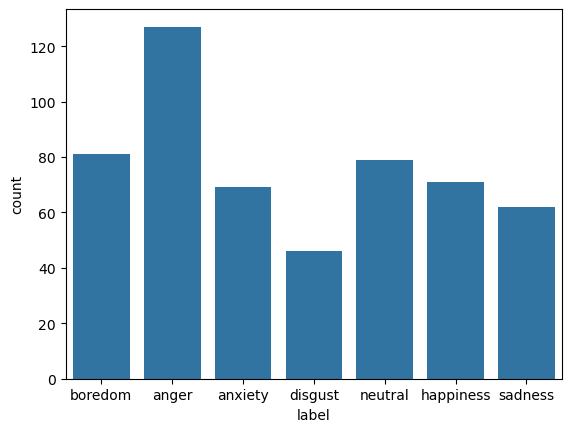

In [11]:
sns.countplot(data=df, x='label')

In [12]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

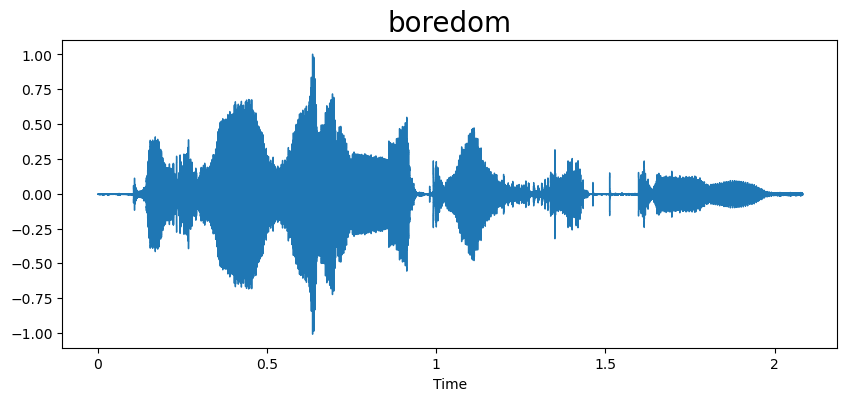

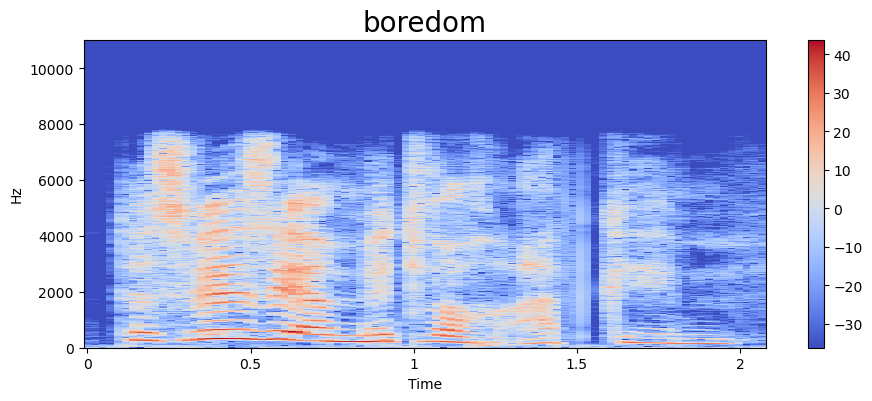

In [18]:
emotion = 'boredom'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

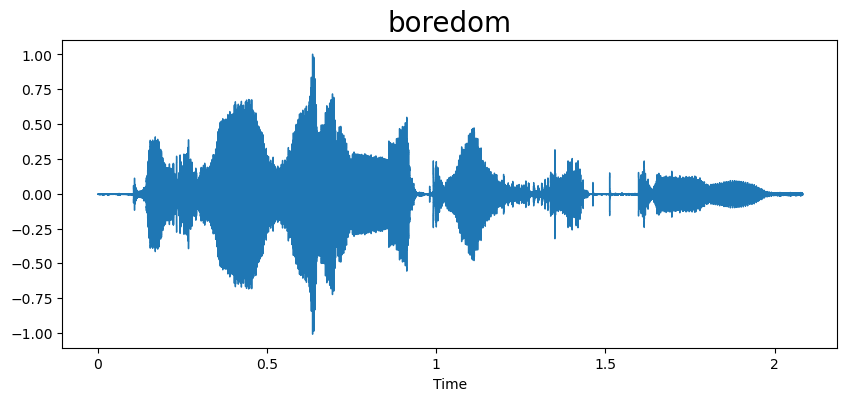

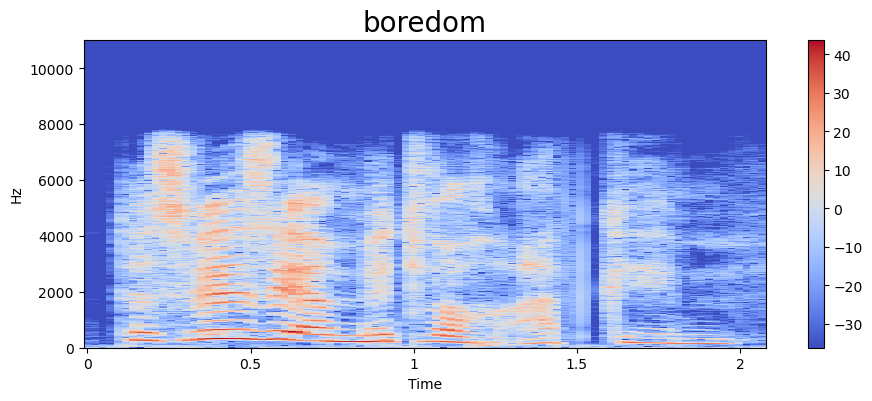

In [19]:
emotion = 'anger'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

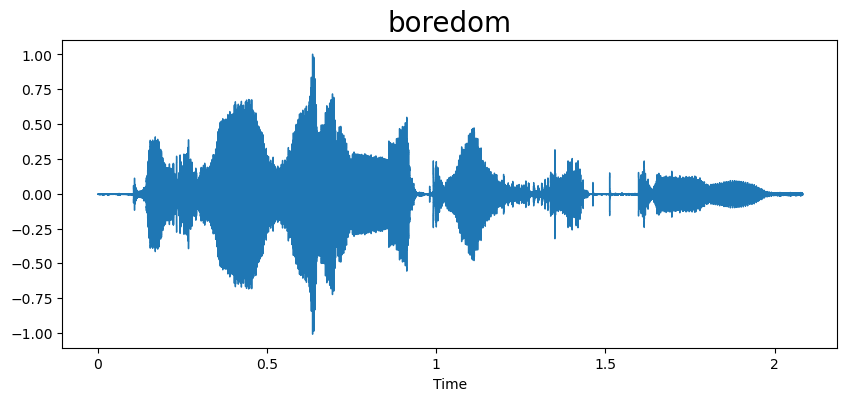

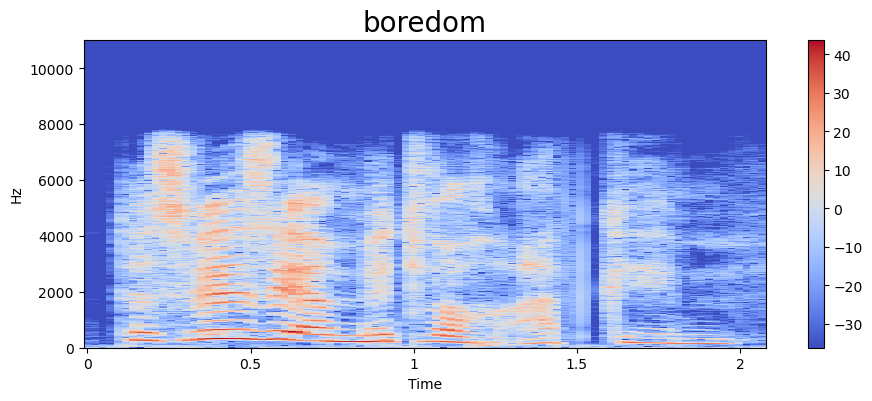

In [20]:
emotion = 'anxiety'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

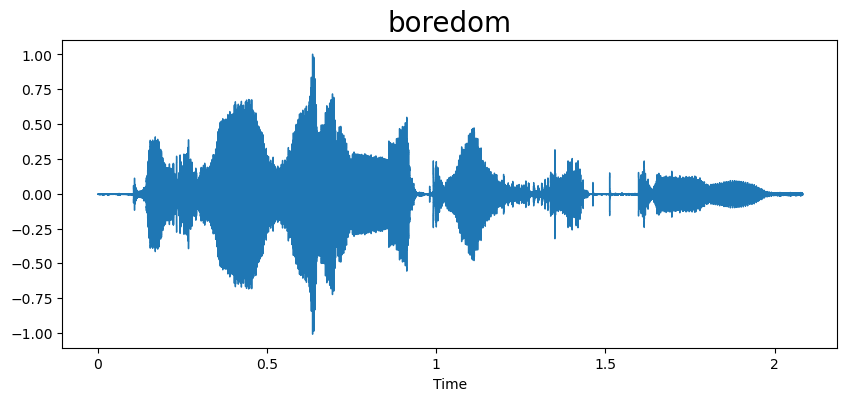

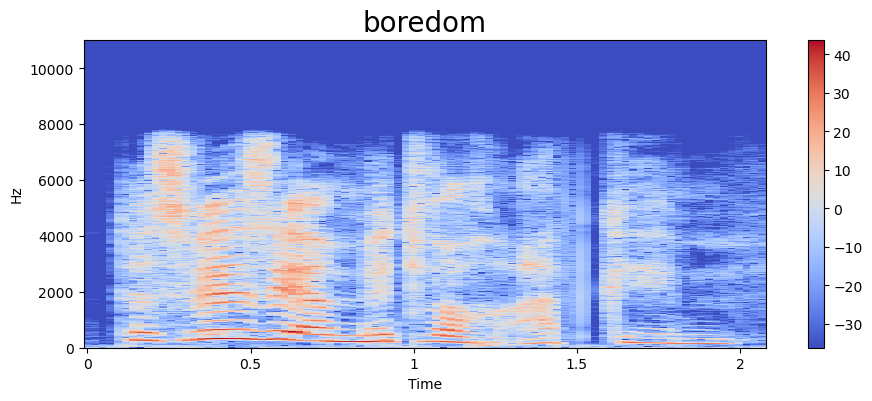

In [21]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

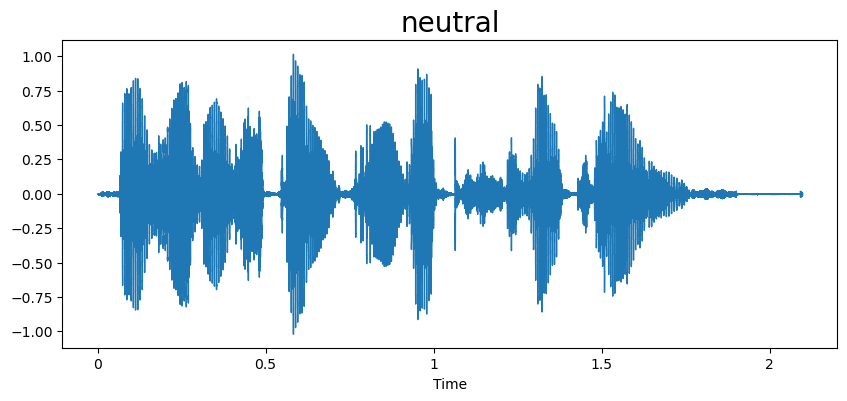

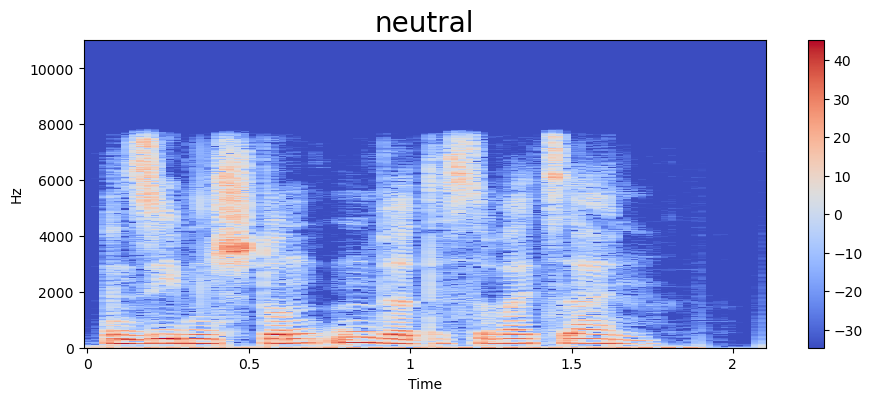

In [24]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

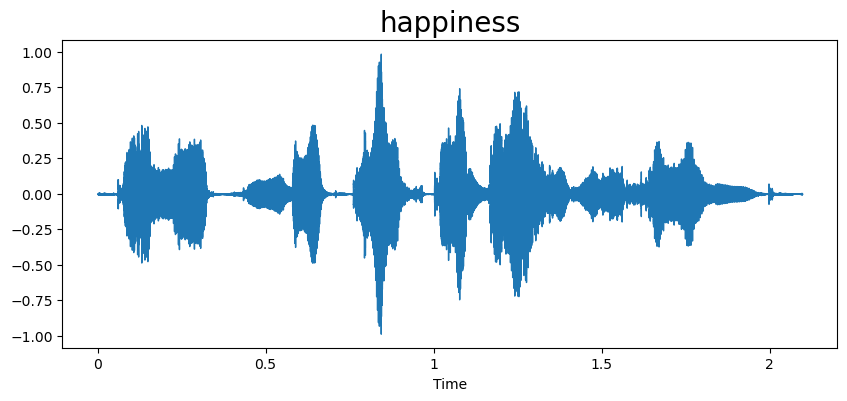

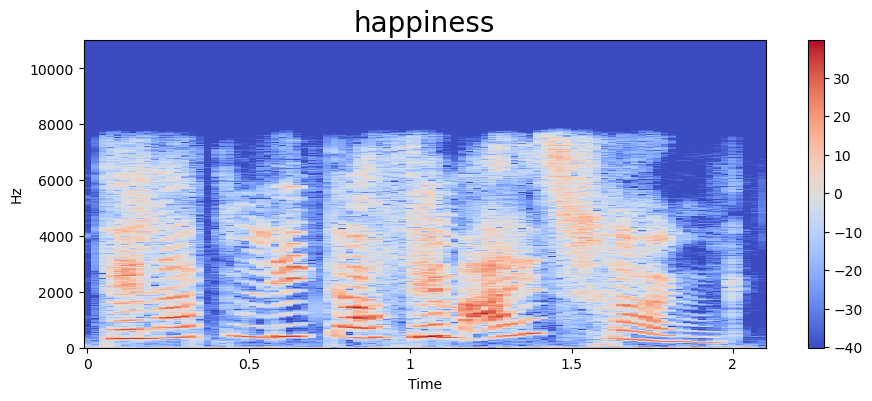

In [25]:
emotion = 'happiness'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

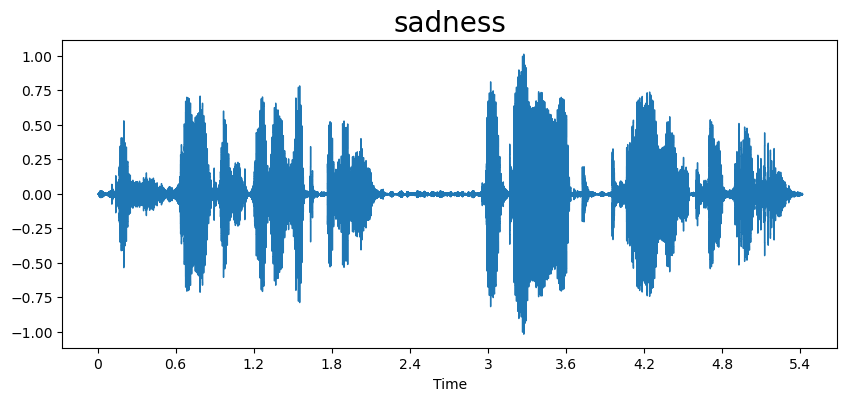

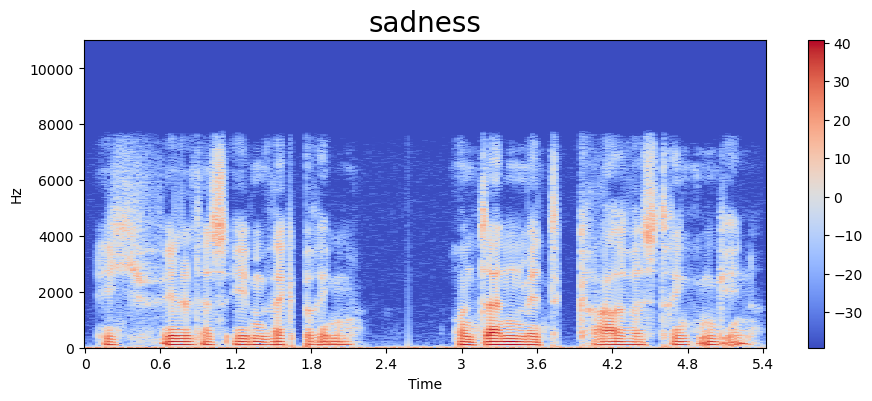

In [26]:
emotion = 'sadness'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [27]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [28]:
extract_mfcc(df['speech'][0])

array([-2.3507788e+02,  8.2945786e+01, -4.4737015e+01,  6.1298752e+01,
       -2.7637049e+01,  1.5315780e+01, -1.5378034e+01, -2.1288078e+00,
       -7.4518018e+00, -6.2098322e+00,  6.0516434e+00, -1.2774576e+01,
       -7.7528965e-01, -7.7442050e+00,  4.0577440e+00, -6.7262702e+00,
       -7.4382706e+00, -2.3333352e+00, -5.7655916e+00, -7.0369782e+00,
       -6.4236826e-01, -3.9712152e+00, -8.4126644e+00,  4.3996825e+00,
       -4.4677339e+00, -1.2952569e+00,  1.8028959e+00,  8.8687904e-02,
        1.3383260e+00,  6.7871604e+00,  7.0038953e+00,  1.8803983e+00,
        3.8022647e+00,  3.8496372e-01,  2.8117476e+00,  1.0845832e+00,
        2.2485201e-01,  1.3101038e+00,  1.1335372e+00,  3.6359491e+00],
      dtype=float32)

In [29]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [30]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(535, 40)

In [31]:
## input split
X = np.expand_dims(X, -1)
X.shape

(535, 40, 1)

In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [33]:
y = y.toarray()

In [34]:
y.shape

(535, 7)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [36]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50


2024-10-30 18:04:18.443759: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 7s 254ms/step - loss: 1.8447 - accuracy: 0.2921 - val_loss: 1.9502 - val_accuracy: 0.2336
Epoch 2/50
7/7 [==============================] - 0s 27ms/step - loss: 1.6832 - accuracy: 0.3785 - val_loss: 1.9227 - val_accuracy: 0.2523
Epoch 3/50
7/7 [==============================] - 0s 25ms/step - loss: 1.6489 - accuracy: 0.3388 - val_loss: 1.9712 - val_accuracy: 0.2523
Epoch 4/50
7/7 [==============================] - 0s 24ms/step - loss: 1.5995 - accuracy: 0.3668 - val_loss: 1.8554 - val_accuracy: 0.2804
Epoch 5/50
7/7 [==============================] - 0s 22ms/step - loss: 1.6267 - accuracy: 0.3785 - val_loss: 1.8321 - val_accuracy: 0.2710
Epoch 6/50
7/7 [==============================] - 0s 24ms/step - loss: 1.5818 - accuracy: 0.3738 - val_loss: 1.6776 - val_accuracy: 0.3551
Epoch 7/50
7/7 [==============================] - 0s 25ms/step - loss: 1.4871 - accuracy: 0.4393 - val_loss: 1.6223 - val_accuracy: 0.4019
Epoch 8/50
7/7 [=====================

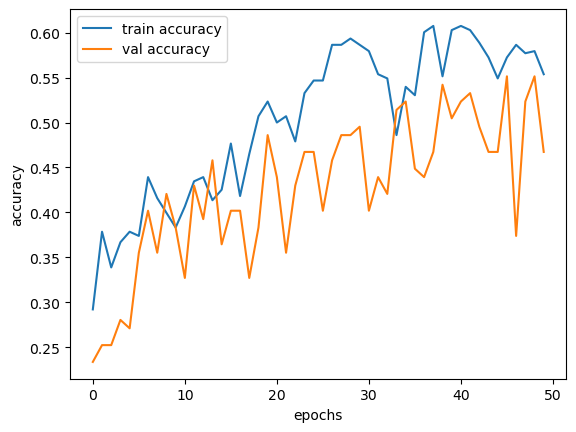

In [37]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


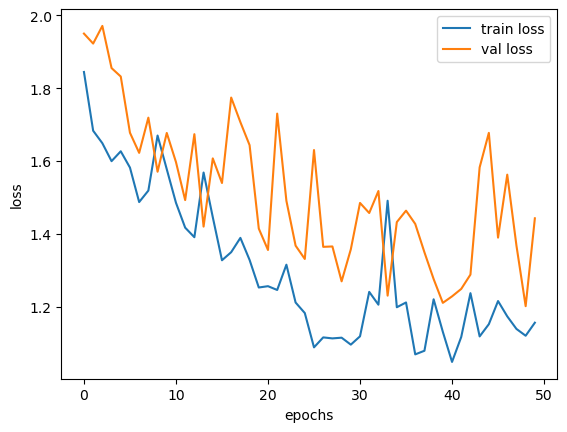

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()